In [ ]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

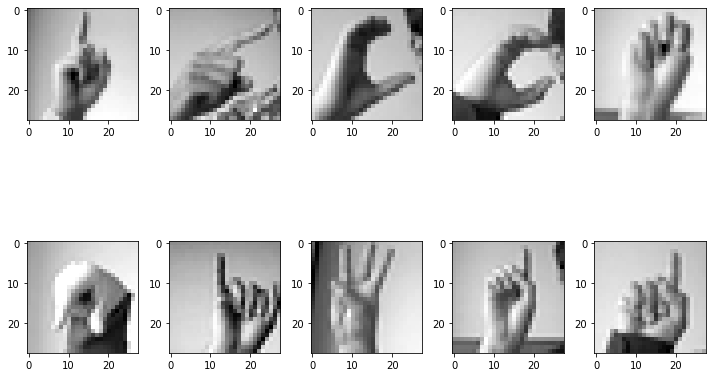

In [ ]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dense_1 (Dense)             (None, 24)                12312     
                                                                 
Total params: 25,703,832
Trainable params: 25,703,704
Non-trainable params: 128
__________________________________________

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1, 
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
fitted_values1 = model.fit(x_train, y_train, 
                          batch_size=128,
                          epochs = 5, 
                          validation_data = (x_test, y_test), 
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 186s 863ms/step - loss: 0.9249 - accuracy: 0.8739 - val_loss: 1.8080 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 180s 837ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8638 - val_accuracy: 0.7793 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 181s 841ms/step - loss: 3.6872e-04 - accuracy: 1.0000 - val_loss: 0.8859 - val_accuracy: 0.7853 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 179s 834ms/step - loss: 1.4161e-04 - accuracy: 1.0000 - val_loss: 1.1159 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - 182s 845ms/step - loss: 7.0688e-05 - accuracy: 1.0000 - val_loss: 1.2234 - val_accuracy: 0.7890 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 12s 51ms/step - loss: 1.2234 - accuracy: 0.7890
Accuracy of the model is -  78.90406847000122 %


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
fitted_values2 = model.fit(x_train, y_train, 
                          batch_size=128,
                          epochs = 5, 
                          validation_data = (x_test, y_test), 
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 78s 358ms/step - loss: 0.5530 - accuracy: 0.8362 - val_loss: 3.3056 - val_accuracy: 0.0739 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 78s 363ms/step - loss: 0.0231 - accuracy: 0.9963 - val_loss: 1.1306 - val_accuracy: 0.6504 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 79s 369ms/step - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.2279 - val_accuracy: 0.9221 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 91s 424ms/step - loss: 0.0079 - accuracy: 0.9982 - val_loss: 0.1826 - val_accuracy: 0.9452 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - 78s 363ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0932 - val_accuracy: 0.9664 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 5s 23ms/step - loss: 0.0932 - accuracy: 0.9664
Accuracy of the model is -  96.63971066474915 %


In [ ]:
image_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False, 
    rotation_range=10, 
    zoom_range = 0.1, 
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=False, 
    vertical_flip=False)  


image_generator.fit(x_train)

In [ ]:
fitted_values3 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128) ,
                    epochs = 5, 
                    validation_data = (x_test, y_test) , 
                    callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 86s 396ms/step - loss: 0.3033 - accuracy: 0.9043 - val_loss: 0.3352 - val_accuracy: 0.8731 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 86s 398ms/step - loss: 0.0859 - accuracy: 0.9712 - val_loss: 0.0271 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 84s 392ms/step - loss: 0.0485 - accuracy: 0.9844 - val_loss: 0.1850 - val_accuracy: 0.9378 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9877
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 84s 392ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0284 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - 84s 390ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0067 - val_accuracy: 0.9974 - lr: 5.0000e-04


In [ ]:
print("Accuracy of the model with data augmentation is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 23ms/step - loss: 0.0067 - accuracy: 0.9974
Accuracy of the model with data augmentation is -  99.7350811958313 %


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
fitted_values4 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128),
                           epochs = 20, 
                           validation_data = (x_test, y_test) , 
                           callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 85s 392ms/step - loss: 0.8760 - accuracy: 0.7268 - val_loss: 3.2145 - val_accuracy: 0.0732 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 88s 410ms/step - loss: 0.1471 - accuracy: 0.9554 - val_loss: 0.8168 - val_accuracy: 0.7421 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 85s 396ms/step - loss: 0.0759 - accuracy: 0.9758 - val_loss: 0.0460 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 85s 394ms/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0543 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9903
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 85s 394ms/step - loss: 0.0325 - accuracy: 0.9903 - val_loss: 0.0464 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 6/20
215/215 [=============================

In [ ]:
print("Accuracy of the model with data augmentation is  - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 5s 24ms/step - loss: 0.0027 - accuracy: 0.9997
Accuracy of the model with data augmentation is  -  99.9721109867096 %


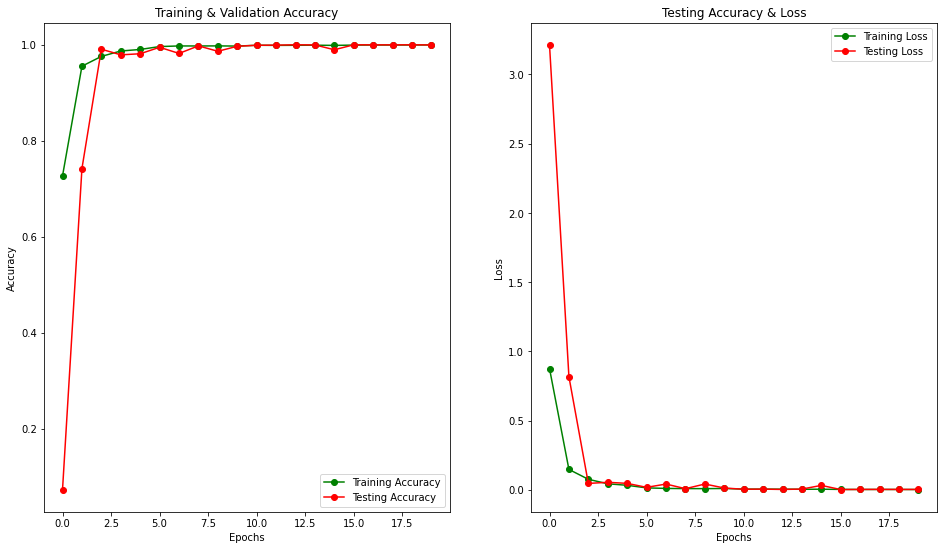

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = fitted_values4.history['accuracy']
train_loss = fitted_values4.history['loss']
val_acc = fitted_values4.history['val_accuracy']
val_loss = fitted_values4.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
model.save("sign_language_cnn_model")

INFO:tensorflow:Assets written to: sign_language_cnn_model/assets
